# Example `Dysmalpy` model generation, using wrapper

**Includes the following components:**

 - Disk + Bulge
 - NFW halo
 - Constant velocity dispersion


## Setup steps ##

**Import modules**

In [1]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

from dysmalpy.fitting_wrappers import dysmalpy_make_model, utils_io
from dysmalpy import plotting

**Setup notebook**

In [2]:
# Setup plotting
import matplotlib.pyplot as plt
%matplotlib inline

**Set output path**

- Note this will override the `outdir` specified in the param file. 

    * *(This is useful for the example here. When running from command line, it's recommended to properly set the directories in the param file.)*

In [3]:
# Where to save output files
outdir = '/Users/sedona/data/dysmalpy_test_examples/JUPYTER_OUTPUT_MODEL_WRAPPER/'

param_filename = '/Users/sedona/data/dysmalpy_test_examples/make_model_3Dcube.params'

-------------------

**Settings in parameter file:**

In [4]:
with open(param_filename, 'r') as f:
    print(f.read())

# Example parameters file for fitting a single object with 1D data
# Note: DO NOT CHANGE THE NAMES IN THE 1ST COLUMN AND KEEP THE COMMAS!!
# See README for a description of each parameter and its available options.

# ******************************* OBJECT INFO **********************************
galID,    GS4_43501    # Name of your object
z,        1.613        # Redshift


## GALAXY CENTER:
# IMPORTANT: 0 indexed, so coordinates go from [0, nX-1] and [0, nY-1].
# So if using QFitsView, will need to subtract 1 from both coords (as QFitsView goes from [1,nX] and [1,nY])
xcenter,              None                       # Center position in cube, x coord. Default: (nX-1)/2.
ycenter,              None                       # Center position in cube, y coord. Default: (nY-1)/2.


# ***************************** OUTPUT *****************************************
outdir,           GS4_43501_3D_model_cube/         # Full path for output directory


# ***************************** OBSERVATION SE

--------

## Generate `Dysmalpy` 3D model cube ##

In [5]:
dysmalpy_make_model.dysmalpy_make_model(param_filename=param_filename, 
                                        outdir=outdir, overwrite=False)

------

## Examine model cube ##

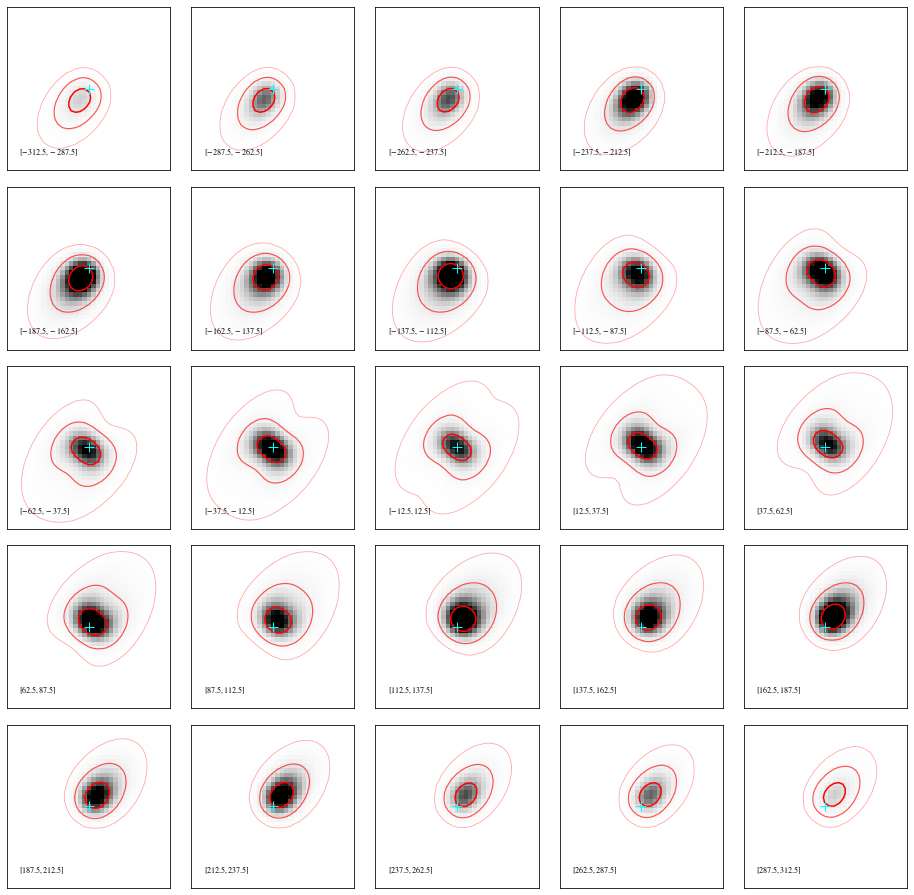

In [6]:
params = utils_io.read_fitting_params(fname=param_filename)
plotting.plot_channel_maps_cube(fname=outdir+params['galID']+'_model_cube.fits', 
                                vbounds = [-312.5, 312.5],delv=25.)

------

## Command line usage ##

To run this script from the command line, you will need to know the full install path to the DysmalPy fitting wrapper directory.

Additionally, you will need to fully specify all output paths, etc, directly in the parameter file.

(Note also that `/PATH/TO/DPY/INSTALL/` must be adjusted for your specific DysmalPy install location).